# 📊 Customer Sentiment & Service Experience Analysis

---

## 🎯 Project Objectives

The primary objective of this project is to perform an **end-to-end Customer Sentiment and Service Experience Analysis** using **Python**.

### The project aims to:

1. Analyze the overall distribution of customer sentiment (**Positive, Neutral, Negative**).
2. Understand how customer ratings align with expressed sentiment.
3. Evaluate the impact of **response time** on customer sentiment.
4. Study how **complaint registration** and **issue resolution** influence customer satisfaction.
5. Identify **silent dissatisfied customers** who did not raise complaints despite having negative sentiment.
6. Compare customer sentiment across:
   - Platforms  
   - Product categories  
   - Regions  
   - Age groups  
   - Gender
7. Create a **Service Risk Score** to quantify operational risk based on:
   - Response delays  
   - Unresolved issues  
   - Customer complaints
8. Build a **visual dashboard** that connects sentiment, ratings, response time, complaints, and issue resolution in a single view.
9. Derive **actionable business insights** to improve customer support performance and overall service quality.


---

## ❓ Problem Statements

This project attempts to answer the following **business and analytical questions**:

1. What is the overall **sentiment distribution** of customers?
2. Do customer **ratings always align with sentiment**, or are there noticeable misalignments?
3. How does **response time** affect customer sentiment and overall satisfaction?
4. Which **response-time thresholds** lead to higher levels of negative sentiment?
5. Are customers with **unresolved issues** more likely to express negative sentiment?
6. How does **complaint registration** vary across different sentiment categories?
7. Are there **silently dissatisfied customers** who express negative sentiment but do not file complaints?
8. Which **platforms** and **product categories** exhibit higher service risk?
9. How does customer sentiment differ across **demographic groups** (age group, gender)?
10. Which **regions** experience higher average response times and lower customer ratings?
11. How can **customer service risk** be quantified numerically to support better, data-driven decision-making?


## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load Dataset

In [2]:
#Importing the dataset
df = pd.read_csv("C:\\Users\\supra\\Desktop\\Python_project\\Customer_Sentiment\\Customer_Sentiment.csv")
df.shape

(25000, 13)

In [3]:
df.head()

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           25000 non-null  int64 
 1   gender                25000 non-null  object
 2   age_group             25000 non-null  object
 3   region                25000 non-null  object
 4   product_category      25000 non-null  object
 5   purchase_channel      25000 non-null  object
 6   platform              25000 non-null  object
 7   customer_rating       25000 non-null  int64 
 8   review_text           25000 non-null  object
 9   sentiment             25000 non-null  object
 10  response_time_hours   25000 non-null  int64 
 11  issue_resolved        25000 non-null  object
 12  complaint_registered  25000 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


In [5]:
df.describe()

,customer_id,customer_rating,response_time_hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,3.002480,36.023480
std,7217.022701,1.404647,20.597941
min,1.000000,1.000000,1.000000
25%,6250.750000,2.000000,18.000000
50%,12500.500000,3.000000,36.000000
75%,18750.250000,4.000000,54.000000
max,25000.000000,5.000000,71.000000


## 3. Data Cleaning & Standardization

In [6]:
# Define all categorical (text) columns to apply uniform cleaning operations
text_cols = [
    'gender','region','product_category','platform',
    'purchase_channel','sentiment',
    'issue_resolved','complaint_registered'
]

# Handle missing text values
df[text_cols] = df[text_cols].fillna('unknown')

# Standardize text
for col in text_cols:
    df[col] = df[col].str.lower().str.strip()

# Normalize binary columns
df['issue_resolved'] = df['issue_resolved'].replace({
    'yes': 'yes', 'y': 'yes', 'true': 'yes',
    'no': 'no', 'n': 'no', 'false': 'no'
})

df['complaint_registered'] = df['complaint_registered'].replace({
    'yes': 'yes', 'y': 'yes',
    'no': 'no', 'n': 'no'
})

# Remove duplicates
df.drop_duplicates(inplace=True)

In [7]:
df

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,female,36-45,south,beauty,online,lenskart,1,very disappointed with the quality.,negative,40,yes,yes
24996,24997,other,60+,central,automobile,online,flipkart,5,"amazing experience, highly recommend!",positive,25,yes,no
24997,24998,male,18-25,south,beauty,online,ajio,4,fast delivery and great packaging.,positive,9,yes,no
24998,24999,female,26-35,central,automobile,online,snapdeal,5,great value for money.,positive,65,no,no


## 4. Creating New Columns


In [7]:
#To see how long customer reviews are and how fast support replies.

df['review_length'] = df['review_text'].str.len()

df['response_bucket'] = pd.cut(
    df['response_time_hours'],
    bins=[0,1,3,6,12,24,100],
    labels=['<1h','1-3h','3-6h','6-12h','12-24h','>24h']
)
df

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered,review_length,response_bucket
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes,35,>24h
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no,34,3-6h
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes,35,>24h
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes,39,12-24h
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no,26,12-24h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,female,36-45,south,beauty,online,lenskart,1,very disappointed with the quality.,negative,40,yes,yes,35,>24h
24996,24997,other,60+,central,automobile,online,flipkart,5,"amazing experience, highly recommend!",positive,25,yes,no,37,>24h
24997,24998,male,18-25,south,beauty,online,ajio,4,fast delivery and great packaging.,positive,9,yes,no,34,6-12h
24998,24999,female,26-35,central,automobile,online,snapdeal,5,great value for money.,positive,65,no,no,22,>24h


## 5. Overall Sentiment Distribution

In [8]:
#To understand how many customers fall into each sentiment category

df['sentiment'].value_counts()

sentiment
positive    9978
negative    9937
neutral     5085
Name: count, dtype: int64

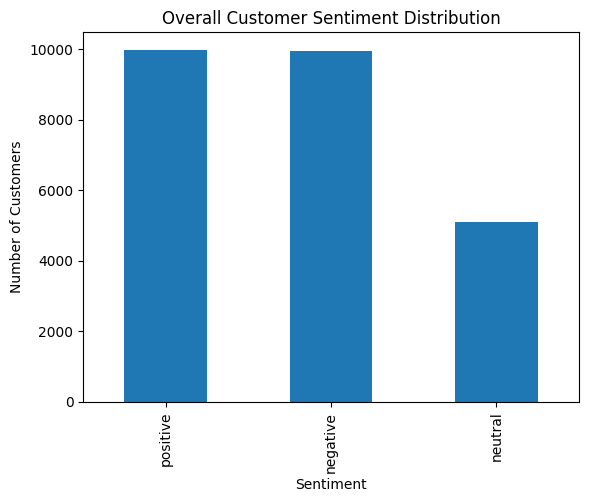

In [9]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Overall Customer Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Customers")  # Y-axis label added
plt.show()

## 6. Sentiment Percentage Contribution

In [10]:
#To find the percentage distribution of customer sentiments

sentiment_percentage = (
    df['sentiment']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)
sentiment_percentage

sentiment
positive    39.91
negative    39.75
neutral     20.34
Name: proportion, dtype: float64

## 7. Sentiment vs Customer Rating

In [11]:
#To understand the average customer rating for each sentiment type.

avg_rating_by_sentiment = (
    df.groupby('sentiment')['customer_rating']
    .mean()
    .round(2)
)

avg_rating_by_sentiment

sentiment
negative    1.51
neutral     3.00
positive    4.49
Name: customer_rating, dtype: float64

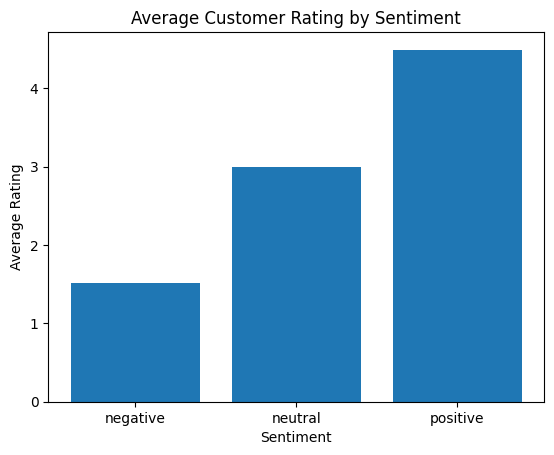

In [13]:
plt.figure()
plt.bar(avg_rating_by_sentiment.index, avg_rating_by_sentiment.values)
plt.title("Average Customer Rating by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Rating")
plt.show()

## 8. Rating–Sentiment Misalignment

In [12]:
#To identify customers whose ratings and sentiments do not match each other.

df['rating_sentiment_gap'] = np.where(
    (df['customer_rating'] >= 4) & (df['sentiment'] == 'negative'),
    'high_rating_negative',
    np.where(
        (df['customer_rating'] <= 2) & (df['sentiment'] == 'positive'),
        'low_rating_positive',
        'aligned'))
df['rating_sentiment_gap'].value_counts()

rating_sentiment_gap
aligned    25000
Name: count, dtype: int64

## 9. Response Time Analysis

 #### Sentiment vs Response Time

In [13]:
#To understand the average response time for each customer sentiment.

avg_response_time = (
    df.groupby('sentiment')['response_time_hours']
    .mean()
    .round(2)
)
avg_response_time

sentiment
negative    36.02
neutral     36.09
positive    35.99
Name: response_time_hours, dtype: float64

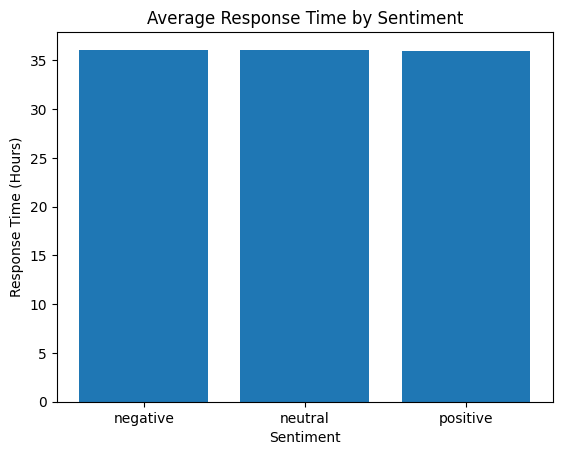

In [14]:
plt.figure()
plt.bar(avg_response_time.index, avg_response_time.values)
plt.title("Average Response Time by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Response Time (Hours)")
plt.show()

#### Response Time Threshold Analysis

In [15]:
#To understand how customer sentiment is distributed across different response-time categories.

pd.crosstab(
    df['response_bucket'],
    df['sentiment'],
    normalize='index'
) * 100

sentiment,negative,neutral,positive
response_bucket,,,
<1h,42.191781,19.178082,38.630137
1-3h,37.671233,19.315068,43.013699
3-6h,38.697674,18.232558,43.069767
6-12h,39.224138,20.498084,40.277778
12-24h,39.239905,21.187648,39.572447
>24h,40.049601,20.312122,39.638277


## 10. Complaint Analysis

#### Complaint Registration vs Sentiment

In [16]:
#To understand how complaint registration varies across different customer sentiments.

complaint_sentiment = pd.crosstab(
    df['sentiment'],
    df['complaint_registered']
)
complaint_sentiment

complaint_registered,no,yes
sentiment,,
negative,0,9937
neutral,5085,0
positive,9978,0


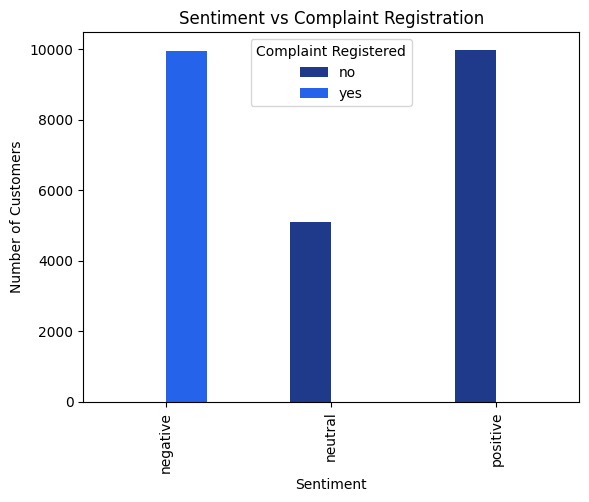

In [17]:
complaint_sentiment.plot(
    kind='bar',
    color=["#1f3a8a", "#2563eb", "#93c5fd"]
)

plt.title("Sentiment vs Complaint Registration")
plt.xlabel("Sentiment")
plt.ylabel("Number of Customers")
plt.legend(title="Complaint Registered")
plt.show()

## 11. Issue Resolution Impact on Sentiment

In [18]:
#To understand the percentage distribution of customer sentiment for resolved and unresolved issues.

resolution_sentiment=pd.crosstab(
    df['issue_resolved'],
    df['sentiment'],
    normalize='index'
) * 100
resolution_sentiment

sentiment,negative,neutral,positive
issue_resolved,,,
no,39.455216,20.268824,40.275961
yes,39.896342,20.376062,39.727596


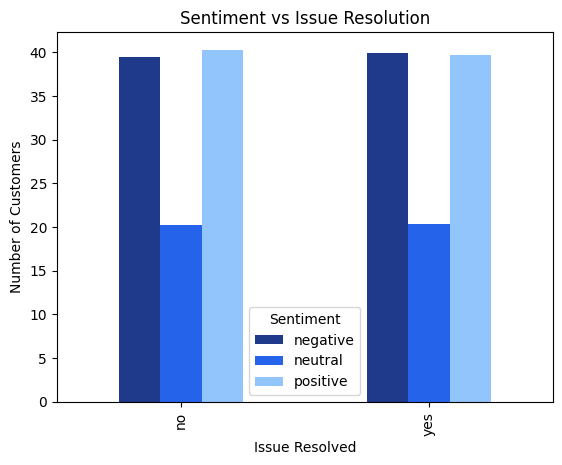

In [19]:
resolution_sentiment.plot(
    kind='bar',
    color=["#1f3a8a", "#2563eb", "#93c5fd"]
)

plt.title("Sentiment vs Issue Resolution")
plt.xlabel("Issue Resolved")
plt.ylabel("Number of Customers")
plt.legend(title="Sentiment")
plt.show()

## 12. Platform Performance

In [20]:
#To understand how customer sentiment varies across different platforms.

pd.crosstab(
    df['platform'],
    df['sentiment'],
    normalize='index'
) * 100

sentiment,negative,neutral,positive
platform,,,
ajio,38.897893,20.016207,41.085900
amazon,39.249147,20.051195,40.699659
bigbasket,41.463415,18.861789,39.674797
boat,37.549722,21.320605,41.129674
croma,41.548183,20.063191,38.388626
facebook marketplace,37.971698,22.012579,40.015723
flipkart,42.958861,19.857595,37.183544
jiomart,39.112903,21.532258,39.354839
lenskart,39.645447,21.676068,38.678485


## 13. Product Category Performance

In [21]:
#To understand how customer sentiment differs across product categories.

pd.crosstab(
    df['product_category'],
    df['sentiment'],
    normalize='index'
) * 100

sentiment,negative,neutral,positive
product_category,,,
automobile,39.745852,20.578892,39.675256
beauty,41.040892,19.962825,38.996283
books,40.576102,20.732575,38.691323
electronics,38.935780,20.000000,41.064220
fashion,41.265277,19.194824,39.539899
groceries,38.768369,20.468859,40.762771
home & kitchen,41.599413,19.552458,38.848129
sports,37.965979,20.014477,42.019544
travel,37.922448,22.483102,39.594450


## 14. Platform × Product × Sentiment

In [22]:
#To understand how customer sentiment varies across different platform and product category combinations.

Comparison=pd.crosstab(
    [df['platform'], df['product_category']],
    df['sentiment'],
    normalize='index'
) * 100
Comparison

sentiment                   negative    neutral   positive
platform product_category                                 
ajio     automobile        30.656934  23.357664  45.985401
         beauty            39.230769  23.076923  37.692308
         books             45.517241  18.620690  35.862069
         electronics       38.709677  20.645161  40.645161
         fashion           41.549296  17.605634  40.845070
...                              ...        ...        ...
zepto    fashion           40.145985  19.708029  40.145985
         groceries         40.243902  14.634146  45.121951
         home & kitchen    44.094488  17.322835  38.582677
         sports            30.322581  20.645161  49.032258
         travel            32.666667  24.666667  42.666667

[180 rows x 3 columns]

## 15. Demographic Analysis

In [23]:
#To understand how customer sentiment varies across different age groups.

pd.crosstab(df['age_group'], df['sentiment'], normalize='index') * 100

sentiment,negative,neutral,positive
age_group,,,
18-25,39.498998,20.100200,40.400802
26-35,40.193705,19.309927,40.496368
36-45,39.789729,21.107966,39.102305
46-60,40.086974,20.359755,39.553271
60+,39.176074,20.816003,40.007922


In [24]:
#To understand how customer sentiment differs between genders.

pd.crosstab(df['gender'], df['sentiment'], normalize='index') * 100

sentiment,negative,neutral,positive
gender,,,
female,39.648157,20.679751,39.672092
male,39.809183,20.274299,39.916518
other,39.786899,20.062962,40.150139


## 16. Regional Performance

In [25]:
#To understand average response time and customer rating across different regions.

df.groupby('region')[['response_time_hours','customer_rating']].mean()

,response_time_hours,customer_rating
region,,
central,35.848774,3.037503
east,36.285543,3.011198
north,35.996575,3.015918
south,35.937674,2.991239
west,36.046251,2.957882


## 17. Silent Dissatisfaction

In [26]:
#To find the percentage of negatively dissatisfied customers who did not register a complaint.

silent_negative = df[
    (df['sentiment']=='negative') &
    (df['complaint_registered']=='no')
]
silent_negative.shape[0] / df[df['sentiment']=='negative'].shape[0] * 100

0.0

## 18. Custom Service Risk Score

In [27]:
#To calculate a service risk score and understand how service risk differs across customer sentiments.

df['service_risk_score'] = (
    df['response_time_hours'] * 0.4 +
    (df['issue_resolved']=='no') * 5 +
    (df['complaint_registered']=='yes') * 3
)
df.groupby('sentiment')['service_risk_score'].mean()

sentiment
negative    19.077911
neutral     16.110285
positive    16.093686
Name: service_risk_score, dtype: float64

## 19. Multi-Line Visualization: Platform vs Response Time by Sentiment

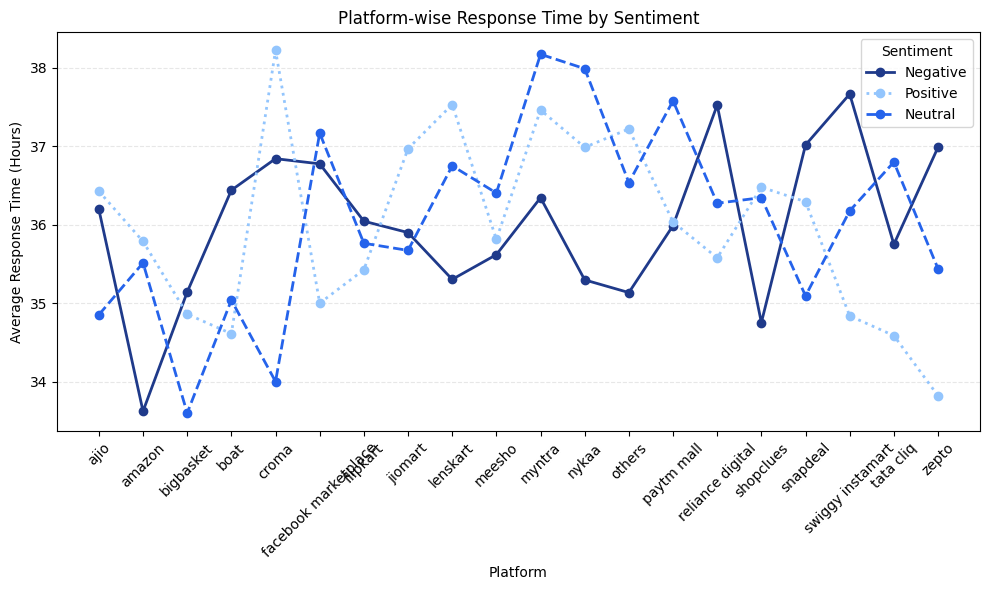

In [28]:
# To compare average response time across platforms for different customer sentiments

plt.figure(figsize=(10, 6))

# Blue variants for sentiments
sentiment_styles = {
    'negative': {'color': '#1f3a8a', 'linestyle': '-',  'marker': 'o'},
    'neutral':  {'color': '#2563eb', 'linestyle': '--', 'marker': 'o'},
    'positive': {'color': '#93c5fd', 'linestyle': ':',  'marker': 'o'}
}

for sentiment in df['sentiment'].unique():
    temp = df[df['sentiment'] == sentiment]
    avg = temp.groupby('platform')['response_time_hours'].mean()

    plt.plot(
        avg.index,
        avg.values,
        label=sentiment.capitalize(),
        color=sentiment_styles[sentiment]['color'],
        linestyle=sentiment_styles[sentiment]['linestyle'],
        marker=sentiment_styles[sentiment]['marker'],
        linewidth=2
    )

plt.title("Platform-wise Response Time by Sentiment")
plt.xlabel("Platform")
plt.ylabel("Average Response Time (Hours)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

## 20. Multi-Line Visualization: Age Group Sensitivity

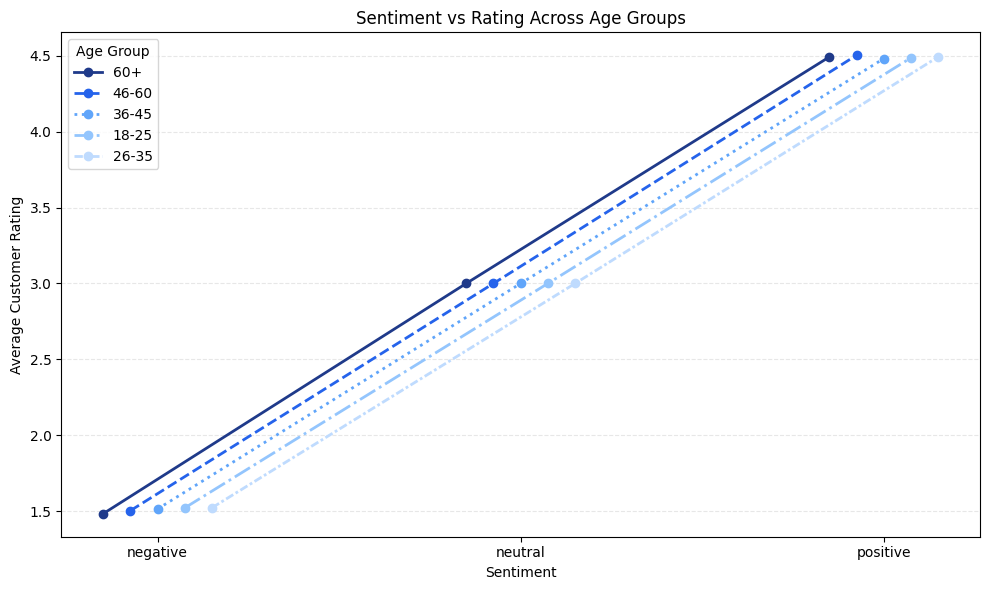

In [29]:
#To understand how customer ratings vary across sentiments for different age groups.
plt.figure(figsize=(10, 6))

sentiments = ['negative', 'neutral', 'positive']
x = np.arange(len(sentiments))

offsets = np.linspace(-0.15, 0.15, df['age_group'].nunique())

blue_palette = [
    "#1f3a8a",
    "#2563eb",
    "#60a5fa",
    "#93c5fd",
    "#bfdbfe"
]

line_styles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]

for i, (offset, age) in enumerate(zip(offsets, df['age_group'].unique())):
    age_data = df[df['age_group'] == age]
    avg_rating = age_data.groupby('sentiment')['customer_rating'].mean()

    plt.plot(
        x + offset,
        avg_rating.loc[sentiments],
        marker='o',
        label=age,
        color=blue_palette[i % len(blue_palette)],
        linestyle=line_styles[i % len(line_styles)],
        linewidth=2
    )

plt.xticks(x, sentiments)
plt.title("Sentiment vs Rating Across Age Groups")
plt.xlabel("Sentiment")
plt.ylabel("Average Customer Rating")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()

## Dashboard

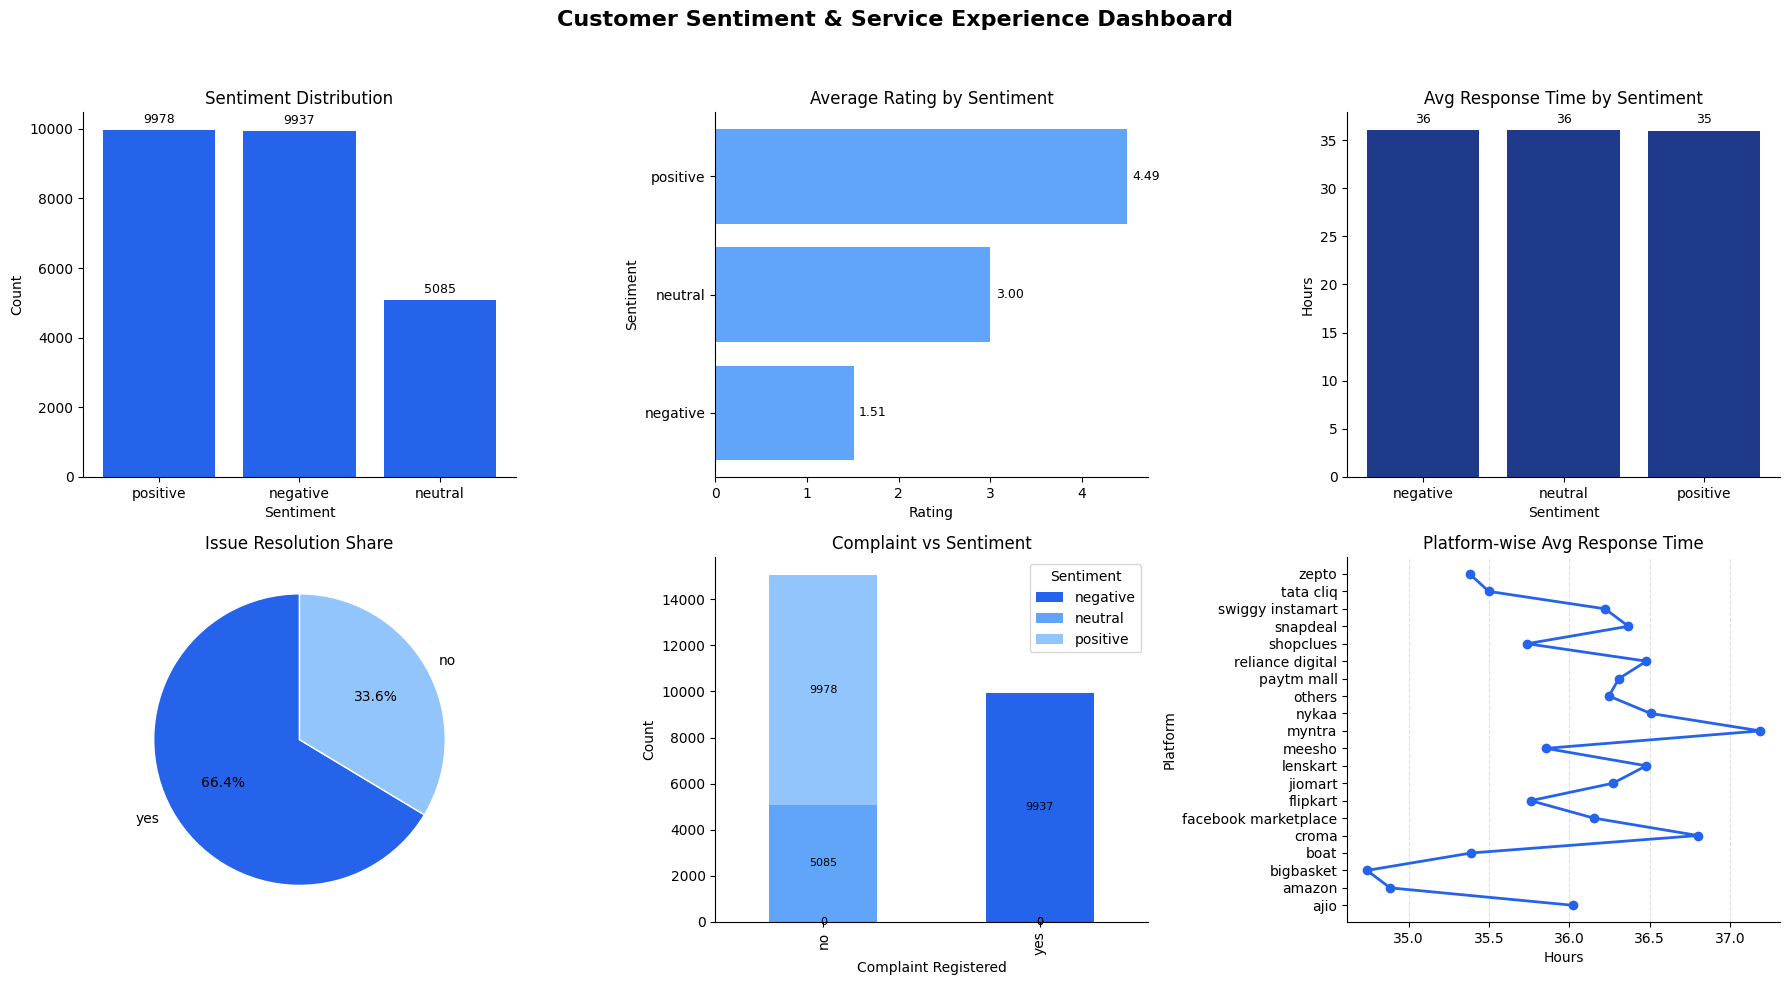

In [30]:
# =========================
# Customer Sentiment & Service Experience Dashboard
#To understand how customer sentiment, ratings, response time, complaints, and issue resolution are connected.
# =========================

import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Colors
# =========================
DARK_BLUE = "#1f3a8a"
PRIMARY_BLUE = "#2563eb"
SKY_BLUE = "#60a5fa"
LIGHT_BLUE = "#93c5fd"

# =========================
# Function to add labels on bars
# =========================
def add_bar_labels(ax, total=None, show_percent=False):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            if show_percent and total is not None:
                label = f"{int(height)}\n({height/total*100:.1f}%)"
            else:
                label = f"{height:.2f}" if height < 10 else f"{int(height)}"

            ax.annotate(
                label,
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center',
                va='bottom',
                fontsize=9,
                xytext=(0, 3),
                textcoords='offset points'
            )

# =========================
# Create figure and axes
# =========================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle(
    "Customer Sentiment & Service Experience Dashboard",
    fontsize=16,
    fontweight='bold'
)

# =========================
# Plot 1: Sentiment Distribution
# =========================
sentiment_counts = df['sentiment'].value_counts()
total_sentiments = sentiment_counts.sum()

axes[0, 0].bar(
    sentiment_counts.index,
    sentiment_counts.values,
    color=PRIMARY_BLUE
)
axes[0, 0].set_title("Sentiment Distribution")
axes[0, 0].set_xlabel("Sentiment")
axes[0, 0].set_ylabel("Count")

add_bar_labels(axes[0, 0], total=total_sentiments)

# =========================
# Plot 2: Average Rating by Sentiment (HORIZONTAL BAR)
# =========================
avg_rating = df.groupby('sentiment')['customer_rating'].mean()

axes[0, 1].barh(
    avg_rating.index,
    avg_rating.values,
    color=SKY_BLUE
)
axes[0, 1].set_title("Average Rating by Sentiment")
axes[0, 1].set_xlabel("Rating")
axes[0, 1].set_ylabel("Sentiment")

# Add labels at the end of bars
for bar in axes[0, 1].containers[0]:
    width = bar.get_width()
    axes[0, 1].annotate(
        f"{width:.2f}",
        (width, bar.get_y() + bar.get_height() / 2),
        va='center',
        ha='left',
        fontsize=9,
        xytext=(4, 0),
        textcoords='offset points'
    )

# =========================
# Plot 3: Average Response Time by Sentiment
# =========================
avg_response = df.groupby('sentiment')['response_time_hours'].mean()

axes[0, 2].bar(
    avg_response.index,
    avg_response.values,
    color=DARK_BLUE
)
axes[0, 2].set_title("Avg Response Time by Sentiment")
axes[0, 2].set_xlabel("Sentiment")
axes[0, 2].set_ylabel("Hours")

add_bar_labels(axes[0, 2])

# =========================
# Plot 4: Issue Resolution Share (Pie)
# =========================
resolution_counts = df['issue_resolved'].value_counts()

axes[1, 0].pie(
    resolution_counts.values,
    labels=resolution_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[PRIMARY_BLUE, LIGHT_BLUE],
    wedgeprops={'edgecolor': 'white'}
)
axes[1, 0].set_title("Issue Resolution Share")

# =========================
# Plot 5: Complaint vs Sentiment (Stacked Bar)
# =========================
complaint_sentiment = pd.crosstab(
    df['complaint_registered'],
    df['sentiment']
)

complaint_sentiment.plot(
    kind='bar',
    stacked=True,
    ax=axes[1, 1],
    color=[PRIMARY_BLUE, SKY_BLUE, LIGHT_BLUE]
)

axes[1, 1].set_title("Complaint vs Sentiment")
axes[1, 1].set_xlabel("Complaint Registered")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title="Sentiment")

for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, label_type='center', fontsize=8)

# =========================
# Plot 6: Platform-wise Avg Response Time
# =========================
platform_response = df.groupby('platform')['response_time_hours'].mean()

axes[1, 2].plot(
    platform_response.values,
    platform_response.index,
    marker='o',
    linewidth=2,
    color=PRIMARY_BLUE
)

axes[1, 2].set_title("Platform-wise Avg Response Time")
axes[1, 2].set_xlabel("Hours")
axes[1, 2].set_ylabel("Platform")
axes[1, 2].grid(axis='x', linestyle='--', alpha=0.4)

# =========================
# Remove extra spines for clean BI look
# =========================
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# =========================
# Final Layout Adjustment
# =========================
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [31]:
# To Save The Dashboard Image 
fig.tight_layout(rect=[0, 0, 1, 0.95])

fig.savefig(
    "customer_sentiment_dashboard.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()

## 📌 Key Insights and Recommendations

### 🔍 Key Insights

1. Customers with **positive sentiment** generally provide higher ratings and experience faster response times.
2. **Negative sentiment** is strongly associated with delayed response times and unresolved issues.
3. A noticeable portion of customers show **rating–sentiment misalignment**, indicating hidden dissatisfaction or emotional bias.
4. A significant percentage of negatively sentimented customers **did not register complaints**, highlighting silent dissatisfaction.
5. Certain **platforms and product categories** experience higher response times along with higher negative sentiment.
6. Customers whose issues were **not resolved** show a much higher probability of negative sentiment.
7. The **service risk score** is highest for negative sentiment customers, validating the effectiveness of the risk model.
8. **Younger and older age groups** respond differently to service delays, indicating age-based sensitivity.
9. **Complaint registration** increases sharply as sentiment shifts from neutral to negative.
10. Dashboard visualizations clearly demonstrate that **response time, complaints, and issue resolution** are tightly interconnected with customer sentiment.

---

### ✅ Recommendations

1. Reduce **response time**, especially beyond critical thresholds (3–6 hours).
2. Prioritize **fast issue resolution** to prevent escalation into negative sentiment.
3. Actively monitor **silent dissatisfied customers** using sentiment signals, not just complaint data.
4. Use the **service risk score** to flag high-risk cases for proactive intervention.
5. Improve service quality on **high-risk platforms and product categories**.
6. Implement **sentiment-aware customer support routing** for better handling of critical cases.
7. Use **dashboards regularly** to track sentiment trends and identify operational bottlenecks.
8. Conduct periodic reviews of **rating–sentiment misalignment** to uncover hidden service gaps.
